In [1]:
# Import the packages that you want to use
import xarray as xr
# Import the packages that I want
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [6]:
# Specify the path to the data on flyingfish
rootdir = '/local/ss23/GFDL_LEs/'
# Specify which experiment you want to look at
experiment = 'OCN/METABOLIC_INDEX/RCP85'
# Specify the file name
filename = 'MI_irr_0.1Wm2_1x1_ens*_1950_2100.nc'
path = rootdir+experiment+'/'+filename
# Load the file using xarray
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble',combine='nested').rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})

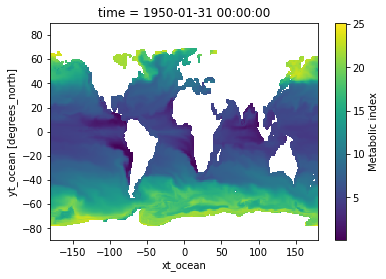

In [10]:
ds_all['MI'].isel(ensemble=1, time=0).plot()

In [53]:
ds_mean = ds_all.groupby('time.year').mean(dim='time')
ds_mean

,Array,Chunk
Bytes,1.17 GB,259.20 kB
Shape,"(151, 30, 180, 360)","(1, 1, 180, 360)"
Count,22770 Tasks,4530 Chunks
Type,float32,numpy.ndarray


In [61]:
min_ens = ds_mean.min(dim='ensemble')

In [62]:
min_ens

,Array,Chunk
Bytes,39.14 MB,259.20 kB
Shape,"(151, 180, 360)","(1, 180, 360)"
Count,28961 Tasks,151 Chunks
Type,float32,numpy.ndarray


/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


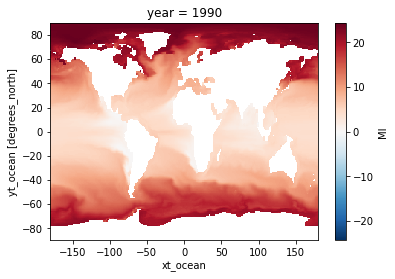

In [63]:
min_ens['MI'].sel(year=1990).plot()

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


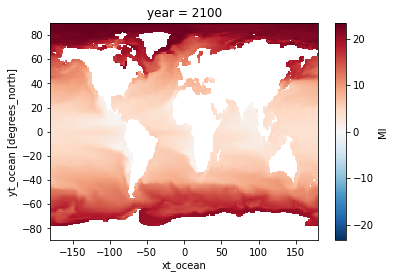

In [57]:
min_ens['MI'].sel(year=2100).plot()

In [66]:
def graph(in_year):
    # Specify the projection you want to use
    crs = ccrs.PlateCarree()

    # Create a figure and axes using matplotlib
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

    # Specify the longitude and latitude, and the variable that you wish to plot
    X = min_ens['xt_ocean']
    Y = min_ens['yt_ocean']
    Z = min_ens['MI'].sel(year=in_year).squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
    # To overcome an issue with the discontinous nature of data in the x-dimension, use the add_cyclic_point function
    Z, X = add_cyclic_point(Z,coord=X)

    # Create a contour plot of SST
    im = ax.contourf(X,Y,Z,transform=crs)

    # Add a land mask to your plot, as well as grid lines and coastlines
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.gridlines()
    ax.coastlines()

    # Give your plot a title
    ax.set_title('1a. Metabolic Index Min Ensemble 1990',fontsize=14,loc='left')

    # Finally, add a colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label('metabolic index',fontsize=12)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encoun

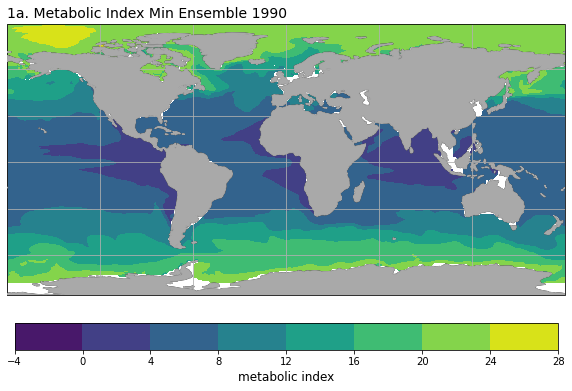

In [67]:
graph(1990)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encoun

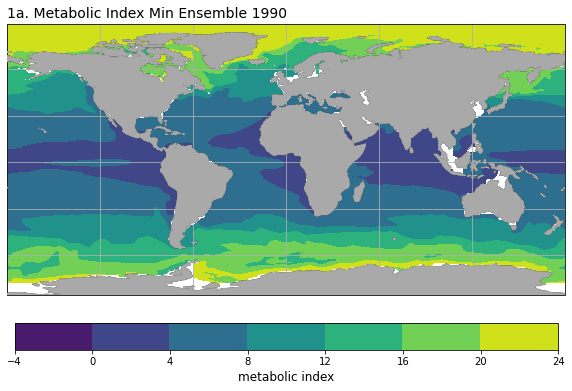

In [68]:
graph(2100)